<a href="https://colab.research.google.com/github/Divyakalgaiya/E-commerce-User-Behavior-Segmentation/blob/main/divya_week3E_commerce_User_Behavior_Segmentation_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* **Project title: E-commerce User Behavior Segmentation**
* **Type: Customer Segmentation**
* **Technique used: Hierarchical Clustering**
* **Submitted by: Divya**

# Project Objectives
* Segment e-commerce customers into meaningful groups using unsupervised clustering algorithms.
* Visualize and interpret the resulting clusters for actionable business decisions.

Github link: https://github.com/Divyakalgaiya/E-commerce-User-Behavior-Segmentation

#Dataset:
This is a transactional data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.

Dataset Characteristics: Multivariate, Sequential, Time-Series

Subject Area: Business

Associated Tasks: Clustering

Feature Type: Integer, Real

Instances: 541909

Features: 6


#Data Loading

In [41]:
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo

# fetch dataset
online_retail = fetch_ucirepo(id=352)

# data (as pandas dataframes)
X = online_retail.data.features
y = online_retail.data.targets
df = online_retail.data.original # Get the original dataframe including index columns

# metadata
print(online_retail.metadata)

# variable information
print(online_retail.variables)

{'uci_id': 352, 'name': 'Online Retail', 'repository_url': 'https://archive.ics.uci.edu/dataset/352/online+retail', 'data_url': 'https://archive.ics.uci.edu/static/public/352/data.csv', 'abstract': 'This is a transactional data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.', 'area': 'Business', 'tasks': ['Classification', 'Clustering'], 'characteristics': ['Multivariate', 'Sequential', 'Time-Series'], 'num_instances': 541909, 'num_features': 6, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': None, 'index_col': ['InvoiceNo', 'StockCode'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2015, 'last_updated': 'Mon Oct 21 2024', 'dataset_doi': '10.24432/C5BW33', 'creators': ['Daqing Chen'], 'intro_paper': {'ID': 361, 'type': 'NATIVE', 'title': 'Data mining for the online retail industry: A case study of RFM model-based customer segmenta

#Import necessary libraries

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering

# First five rows

In [43]:
display(df.head())

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


| **Variable Name** | **Role** | **Type**    | **Description**                                                                                                                        |
| ----------------- | -------- | ----------- | -------------------------------------------------------------------------------------------------------------------------------------- |
| **InvoiceNo**     | ID       | Categorical | A 6-digit integral number uniquely assigned to each transaction. If this code starts with letter **'C'**, it indicates a cancellation. |
| **StockCode**     | ID       | Categorical | A 5-digit integral number uniquely assigned to each distinct product.                                                                  |
| **Description**   | Feature  | Categorical | Product name.                                                                                                                          |
| **Quantity**      | Feature  | Integer     | The quantities of each product (item) per transaction.                                                                                 |
| **InvoiceDate**   | Feature  | Date        | The day and time when each transaction was generated.                                                                                  |
| **UnitPrice**     | Feature  | Continuous  | Product price per unit.                                                                                                                |
| **CustomerID**    | Feature  | Categorical | A 5-digit integral number uniquely assigned to each customer.                                                                          |
| **Country**       | Feature  | Categorical | The name of the country where each customer resides.                                                                                   |


# Datatypes, Index

In [44]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


None

# Statistics summary

In [45]:
display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


In [46]:
display(df.describe(exclude=("int64","float64")).T)

,count,unique,top,freq
InvoiceNo,541909,25900,573585,1114
StockCode,541909,4070,85123A,2313
Description,540455,4223,WHITE HANGING HEART T-LIGHT HOLDER,2369
InvoiceDate,541909,23260,10/31/2011 14:41,1114
Country,541909,38,United Kingdom,495478


# Shape of the data

In [47]:
display(df.shape)

(541909, 8)

# Missing values

In [48]:
display(df.isnull().sum())

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


# Drop missing values

In [49]:
df=df.dropna()
display(df.isnull().sum())

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


# Duplicate values

In [50]:
display(df.duplicated().sum())

np.int64(5225)

In [51]:
duplicate_rows = df[df.duplicated()]
display(duplicate_rows)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,12/1/2010 11:49,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,12/9/2011 11:34,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,12/9/2011 11:34,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,12/9/2011 11:34,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,12/9/2011 11:34,2.10,14446.0,United Kingdom


In [52]:
display(df.Country.unique())

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Saudi Arabia', 'Czech Republic', 'Canada',
       'Unspecified', 'Brazil', 'USA', 'European Community', 'Bahrain',
       'Malta', 'RSA'], dtype=object)

In [53]:
display(df.Quantity.unique())

array([     6,      8,      2,     32,      3,      4,     24,     12,
           48,     18,     20,     36,     80,     64,     10,    120,
           96,     23,      5,      1,     -1,     50,     40,    100,
          192,    432,    144,    288,    -12,    -24,     16,      9,
          128,     25,     30,     28,      7,     72,    200,    600,
          480,     -6,     14,     -2,     -4,     -5,     -7,     -3,
           11,     70,    252,     60,    216,    384,     27,    108,
           52,  -9360,     75,    270,     42,    240,     90,    320,
           17,   1824,    204,     69,    -36,   -192,   -144,    160,
         2880,   1400,     19,     39,    -48,    -50,     56,     13,
         1440,     -8,     15,    720,    -20,    156,    324,     41,
          -10,    -72,    -11,    402,    378,    150,    300,     22,
           34,    408,    972,    208,   1008,     26,   1000,    -25,
         1488,    250,   1394,    400,    110,    -14,     37,    -33,
      

In [54]:
positive_quantity_count = df[df['Quantity'] > 0].shape[0]
negative_quantity_count = df[df['Quantity'] < 0].shape[0]

print(f"Number of positive quantities: {positive_quantity_count}")
print(f"Number of negative quantities: {negative_quantity_count}")

Number of positive quantities: 397924
Number of negative quantities: 8905


Only 8905 negative quantities are recorded, which likely represent order cancellations, product returns, or refunds.

In [55]:
country_distribution = df['Country'].value_counts()
display(country_distribution)

,count
Country,
United Kingdom,361878
Germany,9495
France,8491
EIRE,7485
Spain,2533
Netherlands,2371
Belgium,2069
Switzerland,1877
Portugal,1480


In [56]:
fig = px.pie(country_distribution, values=country_distribution.values, names=country_distribution.index, title='Distribution of Data by Country')
fig.show()

In [57]:
df = df[df['Quantity'] > 0]
df = df[~df['InvoiceNo'].astype(str).str.startswith('c')]
display(df.head())

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [58]:
display(df.shape)

(397924, 8)

After removing cancelled orders, number of rows is equal to 397924.

In [59]:
df_unit=df[df["UnitPrice"]<0]
display(df_unit)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


No negative values in the unitPrice.


# Calculate Total Amount

In [60]:
df["Sales"]=df["Quantity"] * df["UnitPrice"]
display(df)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,16.60


# Country sales

In [61]:
country_sales = df.groupby('Country')['Sales'].sum().sort_values(ascending=False)
display(country_sales)

,Sales
Country,
United Kingdom,7308391.554
Netherlands,285446.340
EIRE,265545.900
Germany,228867.140
France,209024.050
Australia,138521.310
Spain,61577.110
Switzerland,56443.950
Belgium,41196.340


#Purchase frequency

In [62]:
# Calculate purchase frequency (number of unique invoices per customer)
purchase_frequency = df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()

# Rename column
purchase_frequency.columns = ['CustomerID', 'PurchaseFrequency']

display(purchase_frequency.head())

,CustomerID,PurchaseFrequency
0,12346.0,1
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1


# Last transaction

In [63]:
df["InvoiceDate"]=pd.to_datetime(df["InvoiceDate"])
df["Last Transaction"]= (df["InvoiceDate"].max() - df["InvoiceDate"])
display(df["Last Transaction"])

,Last Transaction
0,373 days 04:24:00
1,373 days 04:24:00
2,373 days 04:24:00
3,373 days 04:24:00
4,373 days 04:24:00
...,...
541904,0 days 00:00:00
541905,0 days 00:00:00
541906,0 days 00:00:00
541907,0 days 00:00:00


In [64]:
df["Last Transaction"]=df["Last Transaction"].dt.days
display(df)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales,Last Transaction
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,0
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,0
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,0
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,0


## Table with Customer Information

In [65]:
# Ensure 'CustomerID' is in a common format (e.g., integer) for merging
df['CustomerID'] = df['CustomerID'].astype(int)
purchase_frequency['CustomerID'] = purchase_frequency['CustomerID'].astype(int)

# Merge the dataframes
customer_info_df = pd.merge(df, purchase_frequency, on='CustomerID', how='left')

# Select the requested columns
customer_info_df = customer_info_df[['CustomerID', 'Country', 'Sales', 'Last Transaction', 'PurchaseFrequency']]

# Display the new table
display(customer_info_df.head())

,CustomerID,Country,Sales,Last Transaction,PurchaseFrequency
0,17850,United Kingdom,15.30,373,34
1,17850,United Kingdom,20.34,373,34
2,17850,United Kingdom,22.00,373,34
3,17850,United Kingdom,20.34,373,34
4,17850,United Kingdom,20.34,373,34


## Aggregate Customer Information Table

In [66]:
new_df = customer_info_df.groupby('CustomerID').agg(
    Country=('Country', 'first'),
    TotalSales=('Sales', 'sum'),
    LastTransaction=('Last Transaction', 'min'),
    PurchaseFrequency=('PurchaseFrequency', 'first')
).reset_index()

display(new_df.head())

,CustomerID,Country,TotalSales,LastTransaction,PurchaseFrequency
0,12346,United Kingdom,77183.60,325,1
1,12347,Iceland,4310.00,1,7
2,12348,Finland,1797.24,74,4
3,12349,Italy,1757.55,18,1
4,12350,Norway,334.40,309,1


Boxplot

In [67]:
fig = px.box(new_df, y='TotalSales', title='Interactive Boxplot of Total Sales')
fig.show()

fig = px.box(new_df, y='LastTransaction', title='Interactive Boxplot of Last Transaction')
fig.show()

fig = px.box(new_df, y='PurchaseFrequency', title='Interactive Boxplot of Purchase Frequency')
fig.show()

## Identify and Remove Outliers

In [68]:
Q1 = new_df[['TotalSales', 'LastTransaction', 'PurchaseFrequency']].quantile(0.25)
Q3 = new_df[['TotalSales', 'LastTransaction', 'PurchaseFrequency']].quantile(0.75)
IQR = Q3 - Q1

new_df_no_outliers = new_df[~((new_df[['TotalSales', 'LastTransaction', 'PurchaseFrequency']] < (Q1 - 1.5 * IQR)) | (new_df[['TotalSales', 'LastTransaction', 'PurchaseFrequency']] > (Q3 + 1.5 * IQR))).any(axis=1)]

display(new_df_no_outliers.head())
display(new_df_no_outliers.shape)

,CustomerID,Country,TotalSales,LastTransaction,PurchaseFrequency
2,12348,Finland,1797.24,74,4
3,12349,Italy,1757.55,18,1
4,12350,Norway,334.40,309,1
5,12352,Norway,2506.04,35,8
6,12353,Bahrain,89.00,203,1


(3711, 5)

# Feature Scaling

In [69]:
scaler = StandardScaler()
new_df_scaled = scaler.fit_transform(new_df_no_outliers[['TotalSales', 'LastTransaction', 'PurchaseFrequency']])

new_df_no_outliers_scaled = pd.DataFrame(new_df_scaled, columns=['TotalSales', 'LastTransaction', 'PurchaseFrequency'], index=new_df_no_outliers.index).reset_index()

# Add CustomerID and Country from new_df_no_outliers
new_df_no_outliers_scaled = pd.merge(new_df_no_outliers_scaled, new_df_no_outliers[['CustomerID','Country']], left_on='index', right_index=True, how='left')

# Drop the extra index column
new_df_no_outliers_scaled = new_df_no_outliers_scaled.drop('index', axis=1)

display(new_df_no_outliers_scaled.head())

,TotalSales,LastTransaction,PurchaseFrequency,CustomerID,Country
0,1.118887,-0.170178,0.530859,12348,Finland
1,1.070093,-0.800144,-0.837209,12349,Italy
2,-0.679490,2.473429,-0.837209,12350,Norway
3,1.990267,-0.608904,2.354950,12352,Norway
4,-0.981178,1.280994,-0.837209,12353,Bahrain


## Correlation Heatmap of Scaled Features

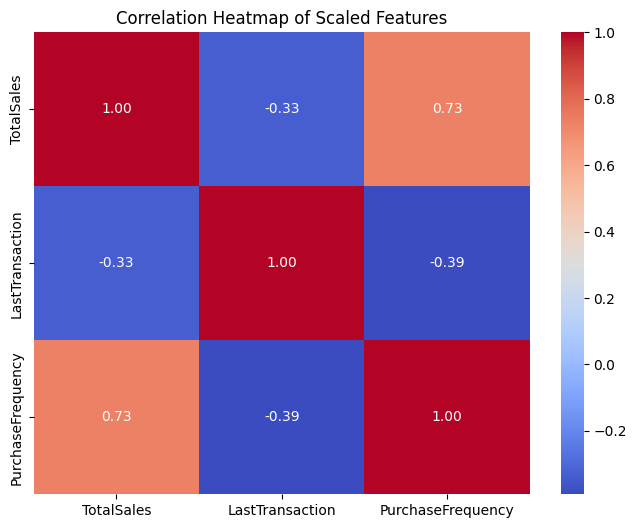

In [70]:
correlation_matrix = new_df_no_outliers_scaled[['TotalSales', 'LastTransaction', 'PurchaseFrequency']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Scaled Features')
plt.show()

In [71]:
fig = px.box(new_df_no_outliers, y='TotalSales', title='Interactive Boxplot of Total Sales (No Outliers)')
fig.show()

fig = px.box(new_df_no_outliers, y='LastTransaction', title='Interactive Boxplot of Last Transaction (No Outliers)')
fig.show()

fig = px.box(new_df_no_outliers, y='PurchaseFrequency', title='Interactive Boxplot of Purchase Frequency (No Outliers)')
fig.show()

# Hierarchical Clustering

> Hierarchical clustering is used to group similar data points together based on their similarity creating a hierarchy or tree-like structure. The key idea is to begin with each data point as its own separate cluster and then progressively merge or split them based on their similarity.

> A dendrogram is like a family tree for clusters. It shows how individual data points or groups of data merge together.





* Agglomerative (Bottom-Up): It starts with each data point as a single cluster and then merges the closest clusters iteratively until all data points are in a single cluster.
* Divisive (Top-Down): This approach starts with all data points in a single cluster and then recursively splits the cluster into smaller clusters until each data point is in its own cluster.

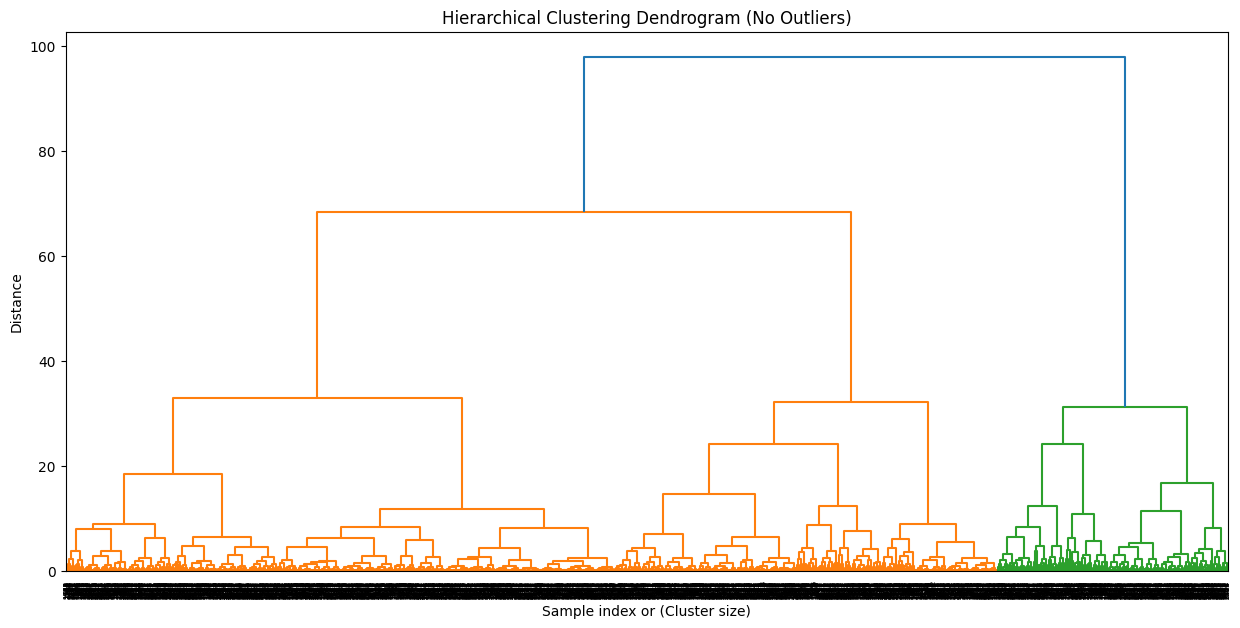

Silhouette Score for 2 clusters (No Outliers): 0.4639849444664296
Silhouette Score for 3 clusters (No Outliers): 0.39628414688700153
Silhouette Score for 4 clusters (No Outliers): 0.3072612890663031
Silhouette Score for 5 clusters (No Outliers): 0.28837074315478195
Silhouette Score for 6 clusters (No Outliers): 0.29299366105842595
Silhouette Score for 7 clusters (No Outliers): 0.2982565948895451
Silhouette Score for 8 clusters (No Outliers): 0.31841381028353405
Silhouette Score for 9 clusters (No Outliers): 0.3034699291915687
Silhouette Score for 10 clusters (No Outliers): 0.3053869961149815


In [72]:
linked_no_outliers = linkage(new_df_no_outliers_scaled[['TotalSales', 'LastTransaction', 'PurchaseFrequency']], method='ward')

plt.figure(figsize=(15, 7))
dendrogram(linked_no_outliers,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram (No Outliers)')
plt.xlabel('Sample index or (Cluster size)')
plt.ylabel('Distance')
plt.show()

silhouette_scores_no_outliers = []
for n_clusters in range(2, 11):
    cluster = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    labels = cluster.fit_predict(new_df_no_outliers_scaled[['TotalSales', 'LastTransaction', 'PurchaseFrequency']])
    score = silhouette_score(new_df_no_outliers_scaled[['TotalSales', 'LastTransaction', 'PurchaseFrequency']], labels)
    silhouette_scores_no_outliers.append(score)
    print(f'Silhouette Score for {n_clusters} clusters (No Outliers): {score}')

In [73]:
n_clusters = 3
cluster = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
new_df_no_outliers_copy = new_df_no_outliers.copy() # Create a copy to avoid the SettingWithCopyWarning
new_df_no_outliers_copy['Cluster'] = cluster.fit_predict(new_df_no_outliers_scaled[['TotalSales', 'LastTransaction', 'PurchaseFrequency']])

fig = px.scatter_3d(new_df_no_outliers_copy, x='LastTransaction', y='PurchaseFrequency', z='TotalSales', color='Cluster', title='Hierarchical Customer Clusters (No Outliers)')
fig.show()

#Observation
* High-Value Customers: Clusters characterized by low Recency (recent purchases), high Frequency (frequent purchases), and high Monetary values (high spending). These are likely the most valuable customers who should be targeted with retention strategies and special offers.
* Losing Customers: Clusters with high Recency (haven't purchased recently) might represent customers who are drifting away. Re-engagement strategies could be crucial for this segment.
* New Customers/Low-Value Customers: Clusters with low Frequency and Sales values could be new customers or those who make infrequent, low-value purchases. Strategies to encourage repeat purchases and increase spending could be relevant here.


# Clustering for UK data
Perform customer clustering for UK data.

In [74]:
df_uk = df[df['Country'] == 'United Kingdom']
display(df_uk.head())
display(df_uk.shape)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales,Last Transaction
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,373
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,373
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,373
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,373
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,373


(354345, 10)

## Data preparation


RFM stands for Recency, Frequency, Monetary — a framework used in customer segmentation to analyze and rank customers based on purchasing behavior.
1. Recency (R)

Definition: How recently a customer made their last purchase.

Calculation: Difference between today (or dataset’s last purchase date) and the date of the customer’s most recent transaction.

Interpretation:

Low Recency value = recent purchase → active customer.

High Recency value = long time since last purchase → inactive/lost customer.

2. Frequency (F)

Definition: How often a customer makes a purchase.

Calculation: Count of unique transactions (e.g., invoices/orders) per customer.

Interpretation:

High Frequency = loyal, repeat buyer.

Low Frequency = occasional or one-time buyer.

3. Monetary (M)

Definition: How much revenue a customer generates.

Calculation: Total amount spent = Quantity × Unit Price summed across all transactions.

Interpretation:

High Monetary = high-value customer.

Low Monetary = low-spending customer.

In [75]:
# Calculate the total sales for each transaction
df_uk['Sales'] = df_uk['Quantity'] * df_uk['UnitPrice']

# Convert 'InvoiceDate' to datetime
df_uk['InvoiceDate'] = pd.to_datetime(df_uk['InvoiceDate'])

# Calculate Recency for each customer
last_transaction_date_usa = df_uk.groupby('CustomerID')['InvoiceDate'].max()
recency_uk = (df['InvoiceDate'].max() - last_transaction_date_usa).dt.days.reset_index()
recency_uk.columns = ['CustomerID', 'Recency']

# Calculate Frequency for each customer
frequency_uk = df_uk.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
frequency_uk.columns = ['CustomerID', 'Frequency']

# Calculate Monetary value for each customer
monetary_uk = df_uk.groupby('CustomerID')['Sales'].sum().reset_index()
monetary_uk.columns = ['CustomerID', 'Monetary']

# Merge the RFM components into a single DataFrame
rfm_df_uk = recency_uk.merge(frequency_uk, on='CustomerID').merge(monetary_uk, on='CustomerID')

# Set CustomerID as index
rfm_df_uk = rfm_df_uk.set_index('CustomerID')

display(rfm_df_uk.head())

/tmp/ipython-input-1781943059.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipython-input-1781943059.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Recency,Frequency,Monetary
CustomerID,,,
12346,325,1,77183.60
12747,1,11,4196.01
12748,0,210,33719.73
12749,3,5,4090.88
12820,2,4,942.34


## Remove outliers and feature scaling


In [76]:
Q1_uk = rfm_df_uk[['Recency', 'Frequency', 'Monetary']].quantile(0.25)
Q3_uk = rfm_df_uk[['Recency', 'Frequency', 'Monetary']].quantile(0.75)
IQR_uk = Q3_uk - Q1_uk

rfm_df_uk_no_outliers = rfm_df_uk[~((rfm_df_uk[['Recency', 'Frequency', 'Monetary']] < (Q1_uk - 1.5 * IQR_uk)) | (rfm_df_uk[['Recency', 'Frequency', 'Monetary']] > (Q3_uk + 1.5 * IQR_uk))).any(axis=1)]

scaler_uk = StandardScaler()
rfm_df_uk_scaled = scaler_uk.fit_transform(rfm_df_uk_no_outliers[['Recency', 'Frequency', 'Monetary']])

rfm_df_uk_scaled = pd.DataFrame(rfm_df_uk_scaled, columns=['Recency', 'Frequency', 'Monetary'], index=rfm_df_uk_no_outliers.index)

display(rfm_df_uk_scaled.head())
display(rfm_df_uk_scaled.shape)

,Recency,Frequency,Monetary
CustomerID,,,
12820,-0.983128,0.541989,0.129297
12821,1.391477,-0.838689,-0.980455
12822,-0.217852,-0.378463,0.137840
12823,-0.172836,1.002215,1.196651
12824,-0.341647,-0.838689,-0.582855


(3366, 3)

## Clustering

In [77]:
silhouette_scores_uk = []
for n_clusters in range(2, 9): # Loop through 2 to 8 clusters
    cluster_uk = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    labels_uk = cluster_uk.fit_predict(rfm_df_uk_scaled)
    # Check if there is more than one cluster and each cluster has at least 2 samples before calculating silhouette score
    if len(set(labels_uk)) > 1 and min([list(labels_uk).count(c) for c in set(labels_uk)]) >= 1:
         score_uk = silhouette_score(rfm_df_uk_scaled, labels_uk)
         silhouette_scores_uk.append(score_uk)
         print(f'Silhouette Score for {n_clusters} clusters (UK): {score_uk}')
    else:
         print(f'Cannot calculate Silhouette Score for {n_clusters} clusters (UK) with the given data.')

Silhouette Score for 2 clusters (UK): 0.444357499040132
Silhouette Score for 3 clusters (UK): 0.4333420016575281
Silhouette Score for 4 clusters (UK): 0.4038769721247784
Silhouette Score for 5 clusters (UK): 0.3297023805818993
Silhouette Score for 6 clusters (UK): 0.3389282414381171
Silhouette Score for 7 clusters (UK): 0.3223246242912059
Silhouette Score for 8 clusters (UK): 0.3245258684072297


Interpretation of Silhouette Scores for UK Data:

The silhouette scores provide an indication of how well-separated the clusters are. A higher silhouette score generally suggests better-defined clusters. Looking at the silhouette scores for the UK data:

The highest silhouette score is for 2 clusters (0.444).
The score for 3 clusters is slightly lower (0.433).
The scores generally decrease as the number of clusters increases, although there are slight variations.
Based on the silhouette scores, clustering the UK data into 2 or 3 clusters seems to yield the best separation and potentially the most meaningful segments according to this metric.

In [78]:
cluster_usa = AgglomerativeClustering(n_clusters=3, linkage='ward')
rfm_df_uk_no_outliers['Cluster'] = cluster_usa.fit_predict(rfm_df_uk_scaled)
display(rfm_df_uk_no_outliers.head())

/tmp/ipython-input-1757937887.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Recency,Frequency,Monetary,Cluster
CustomerID,,,,
12820,2,4,942.34,1
12821,213,1,92.72,2
12822,70,2,948.88,1
12823,74,5,1759.50,0
12824,59,1,397.12,1


In [79]:
rfm_df_uk_no_outliers_reset = rfm_df_uk_no_outliers.reset_index()

rfm_df_uk_melted = rfm_df_uk_no_outliers_reset.melt(id_vars=['CustomerID', 'Cluster'],
                                               value_vars=['Recency', 'Frequency', 'Monetary'],
                                               var_name='Metric',
                                               value_name='Value')

fig = px.box(rfm_df_uk_melted, x='Cluster', y='Value', color='Cluster', facet_col='Metric',
             labels={'Cluster': 'Cluster', 'Value': 'Value'},
             title='Distribution of RFM Metrics by Cluster (UK)')
fig.update_yaxes(matches=None)
fig.show()
fig.write_html("rfm_metrics_by_cluster_uk.html")

#Observations:
Cluster 0 (Champions) drives the majority of revenue. They are recent, frequent, and high spenders → focus on retention & VIP treatment.

Cluster 1 (Moderates) are stable customers → can be targeted with upselling & cross-selling campaigns.

Cluster 2 (At-Risk/Lost) requires reactivation campaigns (discounts, win-back strategies) or may not be worth investing heavily if ROI is poor.

#Conclusion:

By understanding these customer segments, the business can tailor marketing strategies, product offerings, and customer service approaches to better meet the needs and behaviors of their UK customers.